### Storytelling sobre Inclusión financiera en Colombia

#### Objetivo

Evaluar la disponibilidad y utilización de productos financieros en diferentes segmentos de la población en Colombia, utilizando datos de corresponsales, cuentas, créditos y microcréditos.

Este objetivo se enfoca en examinar cómo los productos financieros, como cuentas, créditos y microcréditos, están disponibles y son utilizados por diferentes segmentos de la población en Colombia. Segmentando la población por características demográficas, como género, edad, nivel socioeconómico o ubicación geográfica, y analizar la variación en la adopción y uso de los productos financieros entre estos segmentos.

De esta forma podre tener una visión más detallada de cómo se distribuyen los productos financieros entre diferentes segmentos de la población y si existen disparidades o áreas de oportunidad para mejorar la inclusión financiera en grupos específicos.

Para esta tarea he utilizado una base de datos obtenida del banco de datos del Gobierno de Colombia (DANE) que se encarga de registrar datos exactos y especifios de cada una las entidades bancarias. 

Para que pueda ser revisado, adjunto el enlace del mismo: [Ver Data](https://www.datos.gov.co/Econom-a-y-Finanzas/Inclusi-n-Financiera/ptgf-ywrb/data)

Tambien para apoyar la dato, he comentado algunos datos que nos podrian ayudar a crear un universo descrito, por lo siguiente:

- Población en Colombia: Según el Departamento Administrativo Nacional de Estadística (DANE), la proyección de población para 2021 en Colombia es de aproximadamente 50.3 millones de habitantes. Este dato es fundamental para comprender el tamaño del mercado y la base potencial de clientes para las entidades bancarias.

- Acceso a servicios financieros: Según el Informe de Inclusión Financiera del Banco Mundial, aproximadamente el 79% de los adultos en Colombia tenían acceso a servicios financieros formales en 2018. Este dato muestra el nivel general de acceso a servicios bancarios en el país.

- Cuentas bancarias: Según la Superintendencia Financiera de Colombia, hasta marzo de 2021, había alrededor de 52.5 millones de cuentas de ahorro y corrientes en el país. Este dato refleja el número total de cuentas bancarias utilizadas por la población.

- Uso de canales digitales: De acuerdo con el Informe de Pagos Digitales del Banco de la República, en 2020 se registraron más de 113 millones de transacciones por medios electrónicos y digitales en Colombia. Esto indica el crecimiento y la adopción de canales digitales para realizar operaciones financieras.

- cceso a crédito: Según la Superintendencia Financiera de Colombia, hasta marzo de 2021, el saldo de la cartera de crédito en el país ascendía a aproximadamente 457 billones de pesos colombianos. Este dato muestra el uso de productos de crédito por parte de la población para financiar diferentes necesidades.


#### Tabla de Contenido

1. Introducción
2. Descripción de la Data
3. Análisis Geográfico
    - Departamentos con mayor presencia de entidades bancarias
    - Municipios con mayor número de corresponsales propios y tercerizados
4. Uso de Entidades Bancarias
    - Número de corresponsales activos por entidad
    - Número de depósitos realizados
    - Monto total de los depósitos
    - Número de giros enviados y recibidos
    - Número de pagos y montos
    - Número de retiros y montos
    - Número de transferencias y montos
    - Número total de transacciones y monto total

### 2. Descripción de la Data

El conjunto de datos proporciona información detallada sobre el uso de productos financieros y la cobertura en Colombia. Se recopilaron datos de diversas entidades bancarias en el país, abarcando un período de tiempo específico. El conjunto de datos consta de más de 60,000 filas y 87 columnas, brindando una amplia gama de información sobre la inclusión financiera en el país.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
DATA_PATH = 'Inclusion_Financiera.csv'
data = pd.read_csv(DATA_PATH)

In [52]:
print(data.columns)

Index(['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'NOMBRE DE LA  ENTIDAD',
       'FECHA DE CORTE', 'UNIDAD DE CAPTURA', 'DEPARTAMENTO', 'RENGLON',
       'MUNICIPIO', 'TIPO', 'NRO CORRESPONSALES PROPIOS',
       'NRO CORRESPONSALES TERCERIZADOS', 'NRO CORRESPONSALES ACTIVOS',
       'NRO CORRESPONSALES', 'NRO DEPOSITOS', 'MONTO DEPOSITOS',
       'NRO GIROS ENVIADOS ', 'MONTO GIROS ENVIADOS ', 'NRO GIROS RECIBIDOS',
       'MONTO GIROS RECIBIDOS', 'NRO PAGOS', 'MONTO PAGOS', 'NRO RETIROS',
       'MONTO RETIROS', 'NRO TRANSFERENCIAS', 'MONTO TRANSFERENCIAS',
       'NRO TOTAL ', 'MONTO TOTAL', 'NRO CTA AHORRO HASTA 1 SMMLV',
       'SALDO CTA AHORRO HASTA 1 SMMLV',
       'NRO CTA AHORRO > 1 SMMLV HASTA 3 SMMLV',
       'SALDO CTA AHORRO> 1 SMMLV HASTA 3 SMMLV',
       'NRO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV',
       'SALDO CTA AHORRO> 3 SMMLV HASTA 5 SMMLV', 'NRO CTA AHORRO ACTIVAS',
       'SALDO CTA AHORRO ACTIVAS', 'NRO CTA AHORRO MUJERES',
       'SALDO CTA AHORRO MUJERES', 'NRO 

In [53]:
### generación de data wrangling a la tabla

# Descartar columnas no deseadas
columnas_descartadas = ['TIPO DE ENTIDAD', 'CODIGO DE LA  ENTIDAD', 'RENGLON', 'UNIDAD DE CAPTURA']
data_descartada = data.drop(columns=columnas_descartadas)


# Rellenar valores faltantes con cero
data = data.fillna(0)






In [54]:
data_descartada.head(5)


,NOMBRE DE LA ENTIDAD,FECHA DE CORTE,DEPARTAMENTO,MUNICIPIO,TIPO,NRO CORRESPONSALES PROPIOS,NRO CORRESPONSALES TERCERIZADOS,NRO CORRESPONSALES ACTIVOS,NRO CORRESPONSALES,NRO DEPOSITOS,...,NRO MICROCREDITO> 10SMMLV HASTA 25SMMLV,MONTO MICROCREDI> 10SMMLV HASTA 25SMMLV,NRO MICROCREDITO MUJERES,MONTO MICROCREDITO MUJERES,NRO MICROCREDITO HOMBRES,MONTO MICROCREDITO HOMBRES,NRO TOTAL MICROCREDITO,MONTO TOTAL MICROCREDITO,NRO PROD DEPOSITO NIVEL NACIONAL,MONTO PROD DEPOSITO NIVEL NACIONAL
0,Banco Davivienda,31/12/2017,ANTIOQUIA,URRAO,TRANS Y TRAMITES EN CORRESPONSALES,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
1,Citibank,31/12/2017,ANTIOQUIA,CONCORDIA,TRANS Y TRAMITES EN CORRESPONSALES,0,0,0,0,42,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
2,Banco De Bogota,31/12/2017,ANTIOQUIA,ITAGUI,CREDITO DE VIVIENDA,0,0,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0
3,Coopcentral,31/12/2017,ANTIOQUIA,MEDELLIN,MICROCREDITO,0,0,0,0,0,...,0,0.0,0,0.0,1,29000000.0,1,29000000.0,0.0,0.0
4,Bancamía S.A.,31/12/2017,ANTIOQUIA,SAN CARLOS,CORRESPONSALES,0,1,1,1,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


En tabla anterior puedo enumerar 5 columnas que pueden ser las más relevantes para este documento:

- Municipio: Esta columna indica el municipio donde se encuentra ubicada cada entidad bancaria. Es relevante para identificar la distribución geográfica de las entidades y analizar su cobertura en diferentes regiones.

- Tipo: Esta columna clasifica el tipo de entidad bancaria, como banco comercial, cooperativa de crédito, entidad estatal, entre otros. Esta información es útil para comprender la diversidad de actores en el sistema financiero y su participación en la inclusión financiera.

- Número de corresponsales activos: Esta columna muestra la cantidad de corresponsales activos que tiene cada entidad bancaria. Los corresponsales son agentes autorizados que brindan servicios financieros en áreas donde no hay presencia física de una entidad bancaria. Este dato permite evaluar la infraestructura de atención al cliente y su impacto en la cobertura financiera.

- Número de depósitos: Esta columna registra el número de depósitos realizados en cada entidad bancaria. Es un indicador importante para comprender el nivel de actividad y confianza de los clientes en los servicios financieros ofrecidos.

- Número de créditos de consumo: Esta columna muestra la cantidad de créditos de consumo otorgados por cada entidad bancaria. Permite analizar el acceso y la utilización de productos de crédito por parte de la población, lo cual puede ser un indicador de la capacidad de consumo y el nivel de endeudamiento de los usuarios.


Al igual, hice una pequeña táctica de data wrangling para limpiar de tres columnas y rellnar campos en 0 que a mi parecer es lo mas apropiado para esta tabla.

### 3. Análisis Geográfico

In [55]:
#Selecciono las columnas que necesito para este análisis y genero una nueva tabla

columnas_geograficas = ["DEPARTAMENTO", "MUNICIPIO"]
data_geografica = data[columnas_geograficas]


In [56]:
# Despues entro a la exploración de la data de esta tabla
# Distribución de los departamentos
#departamentos = data_geografica["DEPARTAMENTO"].value_counts()
#print(departamentos)

# Lista de departamentos a omitir
departamentos_omitidos = ["AGREGADORES DE CORRESPONSALES", "CORRESPONSALES TIPO NEGOCIO", "CUENTAS DE AHORRO",
                          "CUENTAS DE AHORRO ELECTRONICAS", "CUENTAS DE AHORRO TRAMITE SIMPLIFICADO",
                          "DEPOSITOS DINERO ELECT TRAMITE SIMPLIFI", "DEPOSITOS DINERO ELECTRONICO",
                          "NARIÃ‘O", "NARIï¾‘O", "TOTAL NACIONAL"]

# Filtrar el DataFrame para excluir los departamentos omitidos
data_filt = data_geografica[~data_geografica["DEPARTAMENTO"].isin(departamentos_omitidos)]

# Contar los departamentos después de omitir los departamentos específicos
departamentos = data_filt["DEPARTAMENTO"].value_counts()
print(departamentos)



ANTIOQUIA                           74620
CUNDINAMARCA                        60143
BOYACA                              47708
SANTANDER                           40649
VALLE DEL CAUCA                     31592
TOLIMA                              27052
NARIﾑO                              24395
HUILA                               22115
BOLIVAR                             20817
CAUCA                               20666
NORTE DE SANTANDER                  19503
CORDOBA                             18645
CALDAS                              17179
META                                17037
ATLANTICO                           15472
CESAR                               15145
MAGDALENA                           14789
SUCRE                               13871
CASANARE                            11597
RISARALDA                           10672
QUINDIO                              9341
LA GUAJIRA                           9305
CAQUETA                              9130
CHOCO                             

In [57]:
# Distribución de los departamentos
municipios = data_geografica["MUNICIPIO"].value_counts()
print(municipios)

TOTAL NACIONAL                 2801
LA UNION                       2674
SANTAFE DE BOGOTA D.           2535
TOTAL BOGOTﾁ                   2359
TOTAL ANTIOQUIA                2278
                               ... 
ESTABLECIMIENTOS DE CRÉDITO       2
SAN FELIPE                        2
PACOA                             2
CACAHUAL                          1
PUERTO ALEGRÍA                    1
Name: MUNICIPIO, Length: 1167, dtype: int64


c:\Users\jacz0\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\jacz0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65425 (\N{HALFWIDTH KATAKANA LETTER MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


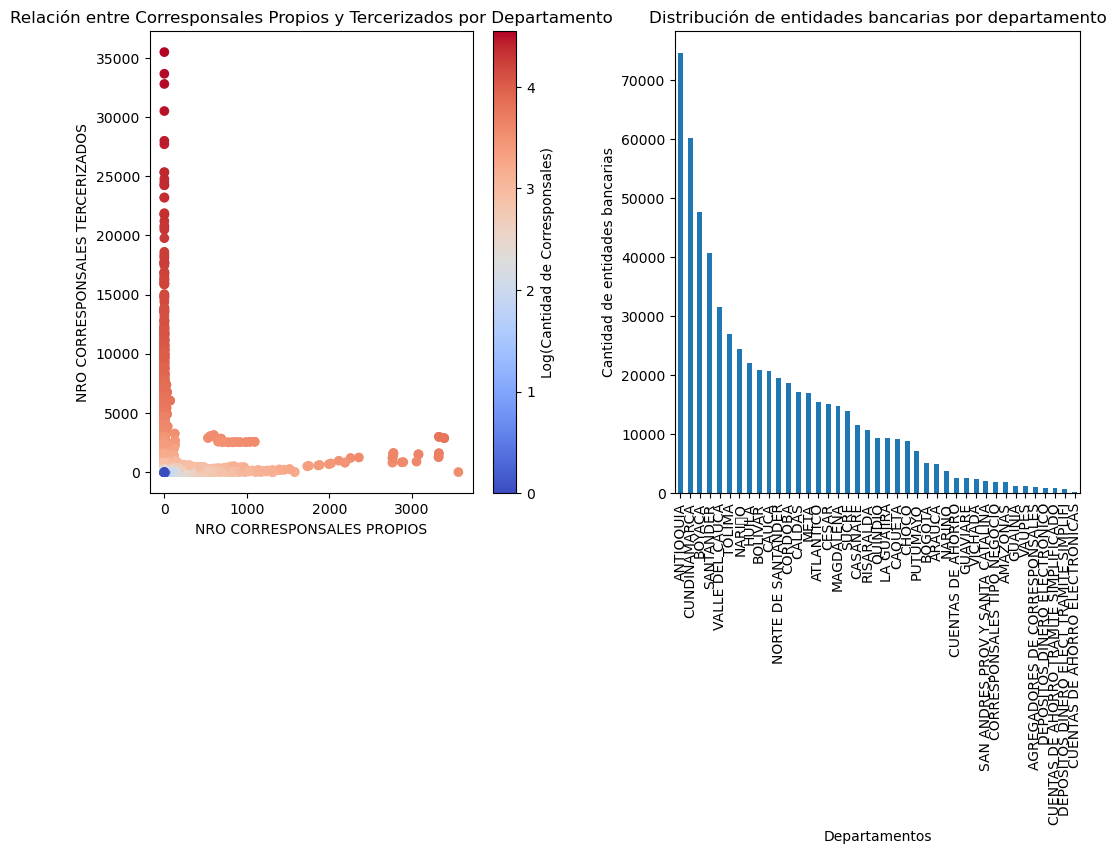

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos relevantes y eliminar filas con valores faltantes (NaN)
data_filt = data[['DEPARTAMENTO', 'NRO CORRESPONSALES PROPIOS', 'NRO CORRESPONSALES TERCERIZADOS']].dropna()

# Excluir la categoría "Total Nacional"
data_filt = data_filt[data_filt['DEPARTAMENTO'] != 'TOTAL NACIONAL']

# Obtener la lista de departamentos
departamentos = data_filt['DEPARTAMENTO'].value_counts()

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de dispersión de corresponsales propios y tercerizados por departamento
x = data_filt['NRO CORRESPONSALES PROPIOS']
y = data_filt['NRO CORRESPONSALES TERCERIZADOS']
c = np.log10(x + y)
scatter = ax1.scatter(x, y, c=c, cmap='coolwarm')
ax1.set_xlabel('NRO CORRESPONSALES PROPIOS')
ax1.set_ylabel('NRO CORRESPONSALES TERCERIZADOS')
ax1.set_title('Relación entre Corresponsales Propios y Tercerizados por Departamento')
fig.colorbar(scatter, ax=ax1, label='Log(Cantidad de Corresponsales)')

# Gráfico de barras de la distribución de entidades bancarias por departamento
departamentos.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Departamentos")
ax2.set_ylabel("Cantidad de entidades bancarias")
ax2.set_title("Distribución de entidades bancarias por departamento")

# Ajustar los espacios entre los subplots
plt.subplots_adjust(wspace=0.3)

# Mostrar la figura con ambos gráficos
plt.show()


En los gráficos anteriores, se observa que las regiones con mayor presencia de entidades bancarias en Colombia son Antioquia, Cundinamarca y Boyacá, superando significativamente a otras ciudades y departamentos. Además, se destaca que el modelo más exitoso para estas entidades es la tercerización de corresponsales. Esta estrategia les permite alcanzar a poblaciones ubicadas en áreas remotas, brindando acceso a servicios financieros a personas que de otra manera tendrían dificultades para acceder a productos bancarios.

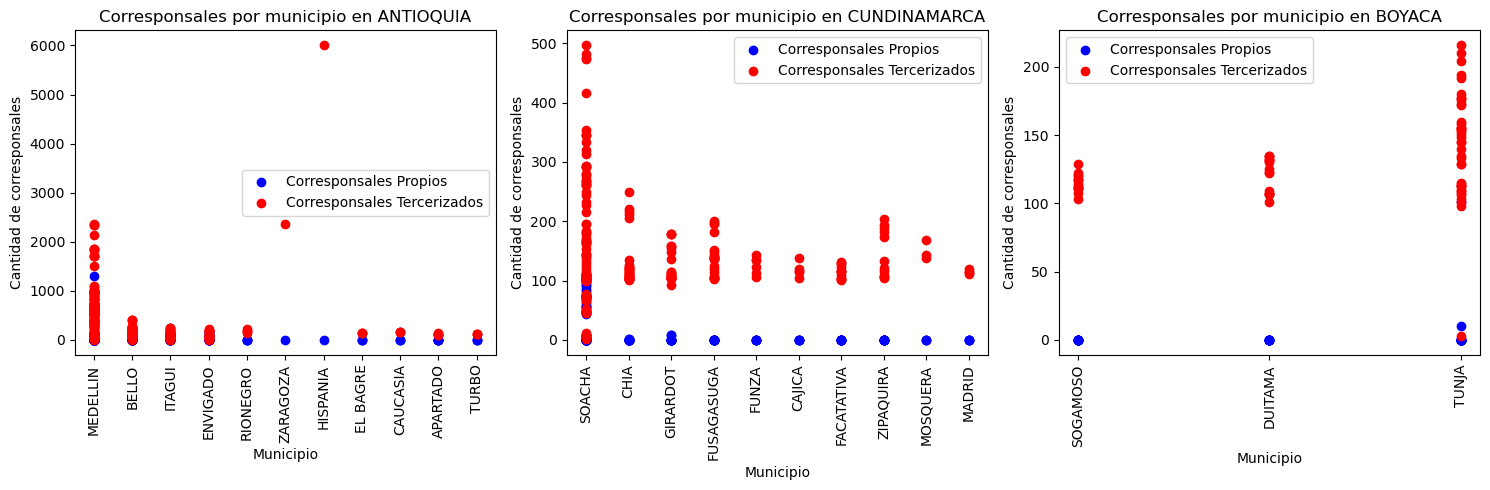

In [66]:
import matplotlib.pyplot as plt

# Filtrar los datos por los departamentos de interés
departamentos_interes = ['ANTIOQUIA', 'CUNDINAMARCA', 'BOYACA']

# Crear una figura con 3 subplots, uno para cada departamento
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar los gráficos para cada departamento
for i, departamento in enumerate(departamentos_interes):
    # Filtrar los datos por el departamento actual
    data_departamento = data[data['DEPARTAMENTO'] == departamento]

    # Filtrar las filas que indican el total
    data_departamento = data_departamento[~data_departamento['MUNICIPIO'].str.contains('TOTAL')]

    # Obtener los municipios y los corresponsales propios y tercerizados del departamento
    municipios = data_departamento['MUNICIPIO']
    corresponsales_propios = data_departamento['NRO CORRESPONSALES PROPIOS']
    corresponsales_tercerizados = data_departamento['NRO CORRESPONSALES TERCERIZADOS']

    # Filtrar los municipios que tienen más de 500 corresponsales
    municipios_filt = municipios[corresponsales_propios + corresponsales_tercerizados > 100]
    corresponsales_propios_filt = corresponsales_propios[corresponsales_propios + corresponsales_tercerizados > 100]
    corresponsales_tercerizados_filt = corresponsales_tercerizados[corresponsales_propios + corresponsales_tercerizados > 100]

    # Generar el gráfico de dispersión para el departamento actual
    axs[i].scatter(municipios_filt, corresponsales_propios_filt, label='Corresponsales Propios', color='blue')
    axs[i].scatter(municipios_filt, corresponsales_tercerizados_filt, label='Corresponsales Tercerizados', color='red')

    # Personalizar el gráfico
    axs[i].set_xlabel('Municipio')
    axs[i].set_ylabel('Cantidad de corresponsales')
    axs[i].set_title(f'Corresponsales por municipio en {departamento}')
    axs[i].legend()

    # Rotar las etiquetas de los ejes x para una mejor legibilidad
    axs[i].tick_params(axis='x', rotation=90)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En el siguiente gráfico, realizamos un enfoque detallado en los tres departamentos con mayor cantidad de corresponsales bancarios. Nuestro objetivo es identificar los municipios que superan los 100 corresponsales y confirmar la hipótesis previa. En el gráfico, los municipios con una cantidad significativa de corresponsales están resaltados en color rojo, representando los corresponsales tercerizados. Esta visualización nos permite identificar de manera clara y concisa los municipios con la mayor cantidad de corresponsales y cómo se distribuyen entre corresponsales propios y tercerizados.

### 4. Uso de Entidades Bancarias

A continuación, se presentan los gráficos correspondientes a las métricas clave relacionadas con el uso de entidades bancarias. Estos gráficos nos permitirán examinar y analizar en detalle la presencia de corresponsales, la actividad de depósitos, giros, pagos, retiros, transferencias y el volumen total de transacciones, proporcionando una visión integral de la participación y el impacto de cada entidad en el sistema financiero

c:\Users\jacz0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 57704 (\ue168) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


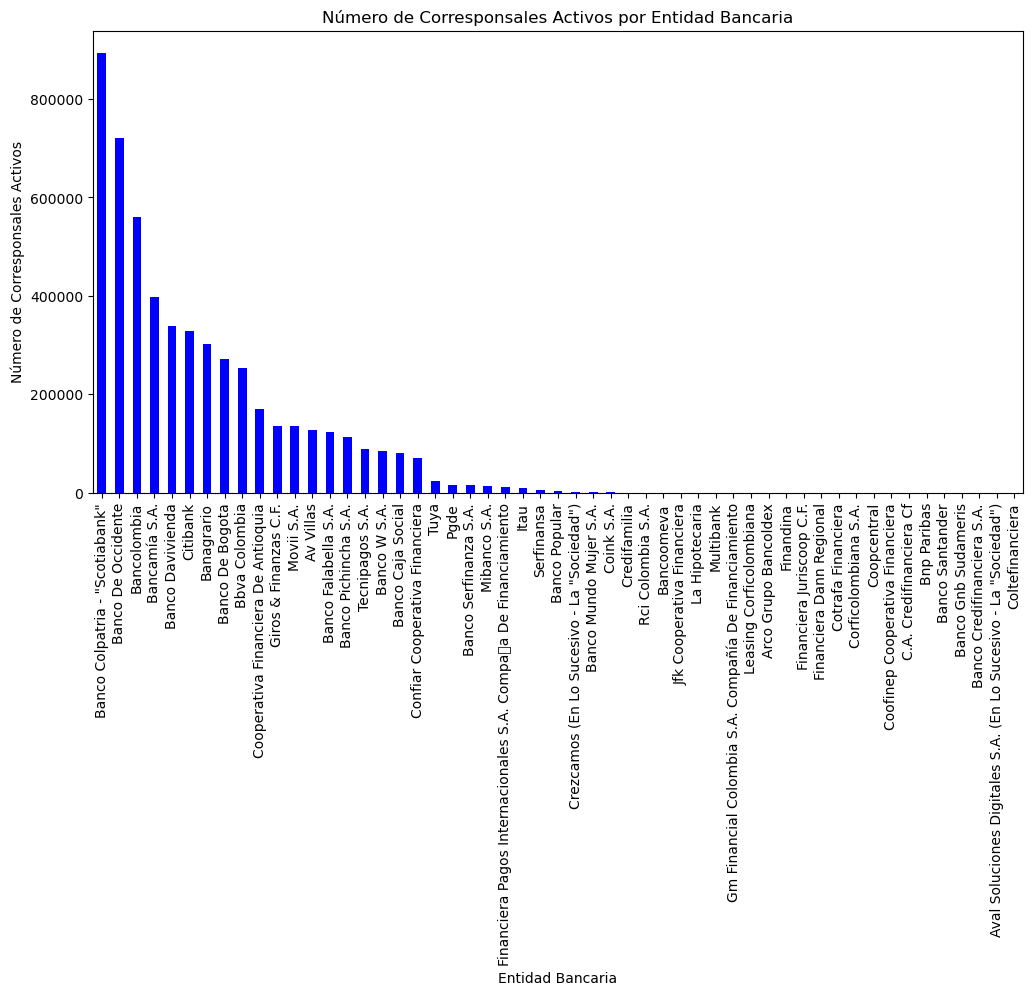

In [83]:
import matplotlib.pyplot as plt

# Filtrar los datos para obtener el número de corresponsales activos por entidad
corresponsales_activos = data.groupby('NOMBRE DE LA  ENTIDAD')['NRO CORRESPONSALES ACTIVOS'].sum()

# Ordenar las entidades por el número de corresponsales activos de forma descendente
corresponsales_activos = corresponsales_activos.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
corresponsales_activos.plot(kind='bar', color='blue')

# Personalizar el gráfico con etiquetas de ejes, título y leyenda
plt.xlabel('Entidad Bancaria')
plt.ylabel('Número de Corresponsales Activos')
plt.title('Número de Corresponsales Activos por Entidad Bancaria')

# Ajustar el espaciado entre las etiquetas del eje x para evitar la superposición
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Al analizar el número de corresponsales activos por entidad bancaria, podemos comparar la presencia de cada entidad en términos de su cantidad de corresponsales. Observamos que los bancos Colpatria, Banco de Occidente y Bancolombia son los que tienen un mayor número de corresponsales activos, lo que indica que atraen a una gran cantidad de usuarios. En estudios futuros, podríamos investigar más a fondo estos tres bancos y los servicios que ofrecen para identificar cuáles son sus fortalezas y potenciales ventajas competitivas.

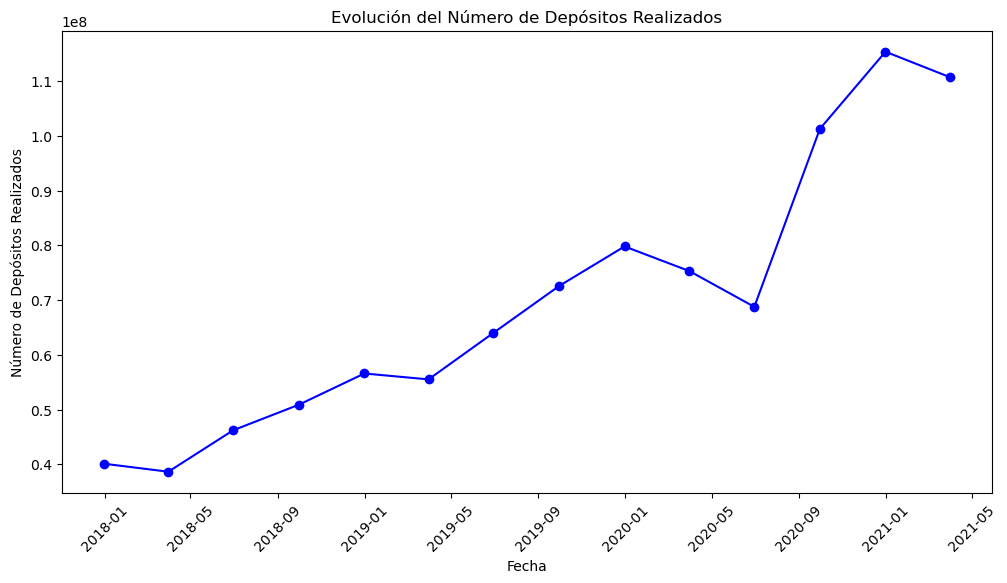

In [81]:
import matplotlib.pyplot as plt

# Convertir la columna 'FECHA DE CORTE' al formato de fecha
data['FECHA DE CORTE'] = pd.to_datetime(data['FECHA DE CORTE'])

# Agrupar los datos por fecha y calcular el número de depósitos realizados
depositos_realizados = data.groupby('FECHA DE CORTE')['NRO DEPOSITOS'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(depositos_realizados.index, depositos_realizados, marker='o', linestyle='-', color='blue')

# Personalizar el gráfico con etiquetas de ejes y título
plt.xlabel('Fecha')
plt.ylabel('Número de Depósitos Realizados')
plt.title('Evolución del Número de Depósitos Realizados')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Al analizar el gráfico del número de depósitos a lo largo del tiempo, podemos observar un aumento progresivo a medida que pasan los años. Este fenómeno puede respaldar dos posibles hipótesis:

1. El incremento en el número de depósitos podría estar relacionado con el aumento de la inflación nacional y del índice de precios al consumidor (IPC). En este escenario, la creciente cantidad de depósitos reflejaría la necesidad de hacer frente a un mayor costo de vida y a un aumento en los gastos diarios de los individuos.

2. Otra explicación plausible podría ser el aumento de la bancarización y el mayor acceso a productos y servicios bancarios. A medida que más personas se incorporan al sistema financiero y tienen acceso a cuentas bancarias, tarjetas de débito o crédito, y otros medios de transacciones electrónicas, es natural que la cantidad de depósitos se incremente debido a una mayor actividad financiera a nivel nacional.

Estas hipótesis sugieren posibles factores que podrían influir en el aumento del número de depósitos a lo largo del tiempo. Sin embargo, sería necesario realizar un análisis más profundo y considerar otros factores para validar estas suposiciones.

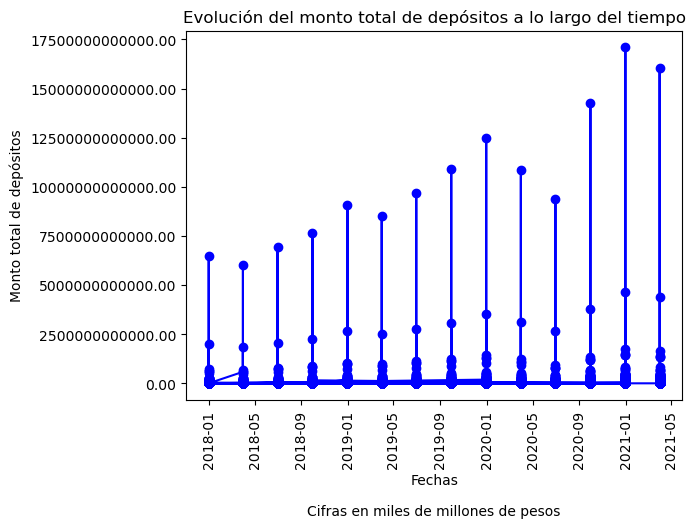

In [94]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Obtener los datos para el gráfico
fechas = data['FECHA DE CORTE']
montos_deposits = data['MONTO DEPOSITOS']

# Crear la figura y los ejes del gráfico
fig, ax = plt.subplots()

# Generar el gráfico de líneas
ax.plot(fechas, montos_deposits, marker='o', linestyle='-', color='b')

# Configurar las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Fechas')
ax.set_ylabel('Monto total de depósitos')
ax.set_title('Evolución del monto total de depósitos a lo largo del tiempo')

# Formatear los valores del eje y como números con dos decimales
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Ajustar el espaciado de las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=90)

# Agregar la nota debajo del gráfico
nota = 'Cifras en miles de millones de pesos'
plt.text(0.5, -0.3, nota, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Mostrar el gráfico
plt.show()


Este gráfico también podría respaldar la idea planteada anteriormente, ya que muestra que a lo largo del tiempo las personas están realizando un mayor número de transacciones y moviendo una mayor cantidad de dinero en cada una de ellas.

El incremento en la cantidad de transacciones y el volumen de dinero involucrado puede ser indicativo de varios factores. Por un lado, podría reflejar un aumento en la actividad económica y comercial, lo cual conlleva un mayor número de intercambios financieros. Además, este fenómeno también podría ser resultado de la evolución tecnológica y la adopción de medios de pago electrónicos, que facilitan y agilizan las transacciones.